<a href="https://colab.research.google.com/github/ahoirg/HyperParametersTuning__PresentationAndMaterials/blob/master/Grid_Search_vs_Randomised_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grid Search vs Randomised Search

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import ParameterGrid, ParameterSampler
import matplotlib.pyplot as plt
import time

In [ ]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Function to create a CNN model
def create_cnn_model(learning_rate=0.001, num_filters=32, kernel_size=3, dense_units=128):
    model = Sequential([
        Conv2D(num_filters, kernel_size, activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# Hyperparameters
hyperparameters = {
    'learning_rate': [0.001, 0.01, 0.1],
    'num_filters': [32, 64],
    'kernel_size': [3],
    'dense_units': [128]
}

In [ ]:
for params in ParameterGrid(hyperparameters):
  print(params)

{'dense_units': 128, 'kernel_size': 3, 'learning_rate': 0.001, 'num_filters': 32}
{'dense_units': 128, 'kernel_size': 3, 'learning_rate': 0.001, 'num_filters': 64}
{'dense_units': 128, 'kernel_size': 3, 'learning_rate': 0.01, 'num_filters': 32}
{'dense_units': 128, 'kernel_size': 3, 'learning_rate': 0.01, 'num_filters': 64}
{'dense_units': 128, 'kernel_size': 3, 'learning_rate': 0.1, 'num_filters': 32}
{'dense_units': 128, 'kernel_size': 3, 'learning_rate': 0.1, 'num_filters': 64}


In [ ]:
for params in ParameterSampler(hyperparameters, n_iter=num_iter, random_state=0):
  print(params)

{'num_filters': 64, 'learning_rate': 0.1, 'kernel_size': 3, 'dense_units': 128}
{'num_filters': 32, 'learning_rate': 0.01, 'kernel_size': 3, 'dense_units': 128}
{'num_filters': 64, 'learning_rate': 0.001, 'kernel_size': 3, 'dense_units': 128}
{'num_filters': 64, 'learning_rate': 0.01, 'kernel_size': 3, 'dense_units': 128}
{'num_filters': 32, 'learning_rate': 0.001, 'kernel_size': 3, 'dense_units': 128}


In [ ]:

# Dictionaries to store results
grid_search_results = {}
random_search_results = {}

# Grid Search
start_time_gs = time.time()
for params in ParameterGrid(hyperparameters):
    model = create_cnn_model(**params)
    model.fit(x_train, y_train, epochs=1, verbose=1)  # Limited epochs for demonstration
    loss, accuracy = model.evaluate(x_test, y_test)
    grid_search_results[str(params)] = {'loss': loss, 'accuracy': accuracy}
end_time_gs = time.time()

# Randomized Search
start_time_rs = time.time()
num_iter = 5  # Limiting the number of iterations for demonstration
for params in ParameterSampler(hyperparameters, n_iter=num_iter, random_state=0):
    model = create_cnn_model(**params)
    model.fit(x_train, y_train, epochs=1, verbose=1)  # Limited epochs for demonstration
    loss, accuracy = model.evaluate(x_test, y_test)
    random_search_results[str(params)] = {'loss': loss, 'accuracy': accuracy}
end_time_rs = time.time()

# Calculate total running time
total_time_gs = end_time_gs - start_time_gs
total_time_rs = end_time_rs - start_time_rs

# Displaying the total running time
print(f"Total Running Time for Grid Search: {total_time_gs:.2f} seconds")
print(f"Total Running Time for Randomized Search: {total_time_rs:.2f} seconds")


313/313 [==============================] - 2s 7ms/step - loss: 0.0605 - accuracy: 0.9792
Total Running Time for Grid Search: 464.52 seconds
Total Running Time for Randomized Search: 369.78 seconds


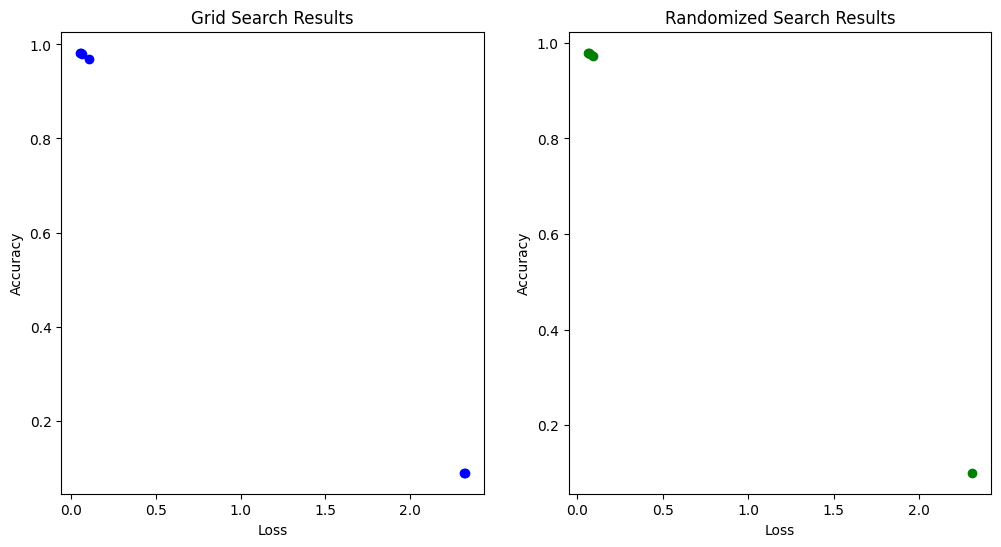

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 6))

# Grid Search Results
losses_gs = [v['loss'] for v in grid_search_results.values()]
accuracies_gs = [v['accuracy'] for v in grid_search_results.values()]
plt.subplot(1, 2, 1)
plt.scatter(losses_gs, accuracies_gs, color='blue')
plt.title('Grid Search Results')
plt.xlabel('Loss')
plt.ylabel('Accuracy')

# Randomized Search Results
losses_rs = [v['loss'] for v in random_search_results.values()]
accuracies_rs = [v['accuracy'] for v in random_search_results.values()]
plt.subplot(1, 2, 2)
plt.scatter(losses_rs, accuracies_rs, color='green')
plt.title('Randomized Search Results')
plt.xlabel('Loss')
plt.ylabel('Accuracy')

plt.show()

high_hyperparameters

In [ ]:
high_hyperparameters = {
    'learning_rate': [0.001, 0.005, 0.01],
    'num_filters': [32, 64],
    'kernel_size': [3, 5],
    'dense_units': [128, 256]
}

In [ ]:
for params in ParameterGrid(high_hyperparameters):
  print(params)

{'dense_units': 128, 'kernel_size': 3, 'learning_rate': 0.001, 'num_filters': 32}
{'dense_units': 128, 'kernel_size': 3, 'learning_rate': 0.001, 'num_filters': 64}
{'dense_units': 128, 'kernel_size': 3, 'learning_rate': 0.005, 'num_filters': 32}
{'dense_units': 128, 'kernel_size': 3, 'learning_rate': 0.005, 'num_filters': 64}
{'dense_units': 128, 'kernel_size': 3, 'learning_rate': 0.01, 'num_filters': 32}
{'dense_units': 128, 'kernel_size': 3, 'learning_rate': 0.01, 'num_filters': 64}
{'dense_units': 128, 'kernel_size': 5, 'learning_rate': 0.001, 'num_filters': 32}
{'dense_units': 128, 'kernel_size': 5, 'learning_rate': 0.001, 'num_filters': 64}
{'dense_units': 128, 'kernel_size': 5, 'learning_rate': 0.005, 'num_filters': 32}
{'dense_units': 128, 'kernel_size': 5, 'learning_rate': 0.005, 'num_filters': 64}
{'dense_units': 128, 'kernel_size': 5, 'learning_rate': 0.01, 'num_filters': 32}
{'dense_units': 128, 'kernel_size': 5, 'learning_rate': 0.01, 'num_filters': 64}
{'dense_units': 256,

In [ ]:
# Dictionaries to store results
grid_search_results = {}
random_search_results = {}

# Grid Search
start_time_gs = time.time()
for params in ParameterGrid(high_hyperparameters):
    model = create_cnn_model(**params)
    model.fit(x_train, y_train, epochs=1, verbose=1)  # Limited epochs for demonstration
    loss, accuracy = model.evaluate(x_test, y_test)
    grid_search_results[str(params)] = {'loss': loss, 'accuracy': accuracy}
end_time_gs = time.time()

# Randomized Search
start_time_rs = time.time()
num_iter = 10  # Limiting the number of iterations for demonstration
for params in ParameterSampler(high_hyperparameters, n_iter=num_iter, random_state=0):
    model = create_cnn_model(**params)
    model.fit(x_train, y_train, epochs=1, verbose=1)  # Limited epochs for demonstration
    loss, accuracy = model.evaluate(x_test, y_test)
    random_search_results[str(params)] = {'loss': loss, 'accuracy': accuracy}
end_time_rs = time.time()

# Calculate total running time
total_time_gs = end_time_gs - start_time_gs
total_time_rs = end_time_rs - start_time_rs

# Displaying the total running time
print(f"High_hyperparameters: Total Running Time for Grid Search: {total_time_gs:.2f} seconds")
print(f"High_hyperparameters: Total Running Time for Randomized Search: {total_time_rs:.2f} seconds")

313/313 [==============================] - 2s 7ms/step - loss: 0.0612 - accuracy: 0.9808
High_hyperparameters: Total Running Time for Grid Search: 2131.64 seconds
High_hyperparameters: Total Running Time for Randomized Search: 915.04 seconds


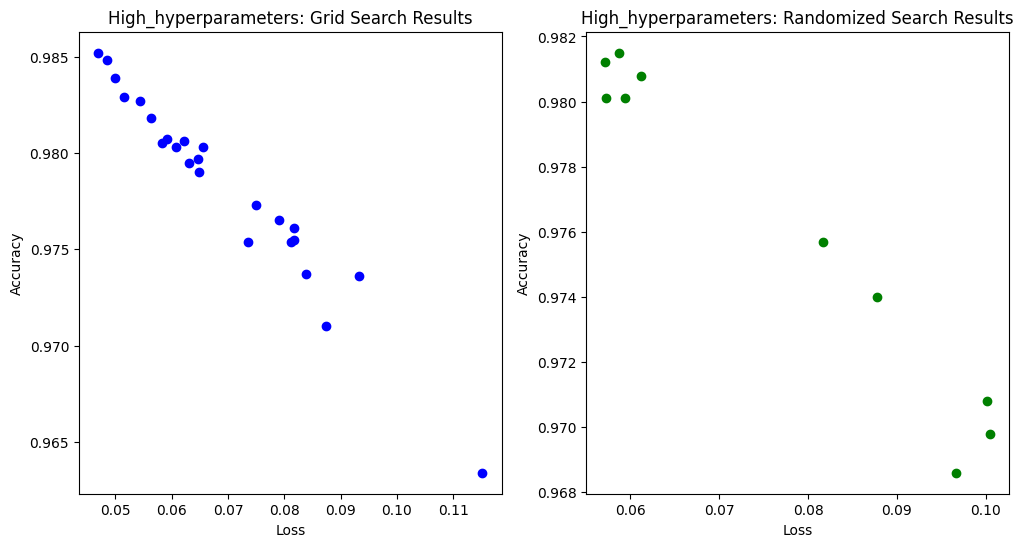

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 6))

# Grid Search Results
losses_gs = [v['loss'] for v in grid_search_results.values()]
accuracies_gs = [v['accuracy'] for v in grid_search_results.values()]
plt.subplot(1, 2, 1)
plt.scatter(losses_gs, accuracies_gs, color='blue')
plt.title('High_hyperparameters: Grid Search Results')
plt.xlabel('Loss')
plt.ylabel('Accuracy')

# Randomized Search Results
losses_rs = [v['loss'] for v in random_search_results.values()]
accuracies_rs = [v['accuracy'] for v in random_search_results.values()]
plt.subplot(1, 2, 2)
plt.scatter(losses_rs, accuracies_rs, color='green')
plt.title('High_hyperparameters: Randomized Search Results')
plt.xlabel('Loss')
plt.ylabel('Accuracy')

plt.show()

In [ ]:
# Grid Search sonuçlarını loss'a göre sıralama ve en iyi 5 değeri seçme
sorted_grid_search_by_loss = sorted(grid_search_results.items(), key=lambda x: x[1]['loss'])[:1]

# Randomized Search sonuçlarını loss'a göre sıralama ve en iyi 5 değeri seçme
sorted_random_search_by_loss = sorted(random_search_results.items(), key=lambda x: x[1]['loss'])[:1]

# Sıralanmış ve filtrelenmiş sonuçları yeni değişkenlere atama
sorted_gs_losses = [v['loss'] for k, v in sorted_grid_search_by_loss]
sorted_gs_accuracies = [v['accuracy'] for k, v in sorted_grid_search_by_loss]

sorted_rs_losses = [v['loss'] for k, v in sorted_random_search_by_loss]
sorted_rs_accuracies = [v['accuracy'] for k, v in sorted_random_search_by_loss]

In [ ]:
sorted_grid_search_by_loss[0][1]

{'loss': 0.04695797339081764, 'accuracy': 0.9851999878883362}

In [ ]:
sorted_random_search_by_loss[0][1]

{'loss': 0.05719023942947388, 'accuracy': 0.9811999797821045}